In [1]:
pip install nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.0 MB/s eta 0:00:00


In [2]:
from nixtla import NixtlaClient

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-wpuxSsYvu5Eg6RWc8Hy5XgTGP49qdgsJXBSa7KDwn5aJF29BbK3StWnIM9p9KALGIQLqu4Msjng819nA'
)

In [4]:
nixtla_client.validate_api_key()

True

In [5]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Jaisalmer.csv')
df.head()

,Date/Time,100m,120m,40m,80m
0,2014-01-01 00:00:00,9.31,9.90,5.38,8.44
1,2014-01-01 00:15:00,9.31,9.90,5.36,8.41
2,2014-01-01 00:30:00,9.22,9.83,5.27,8.31
3,2014-01-01 00:45:00,8.96,9.62,5.08,8.02
4,2014-01-01 01:00:00,8.79,9.48,4.96,7.85


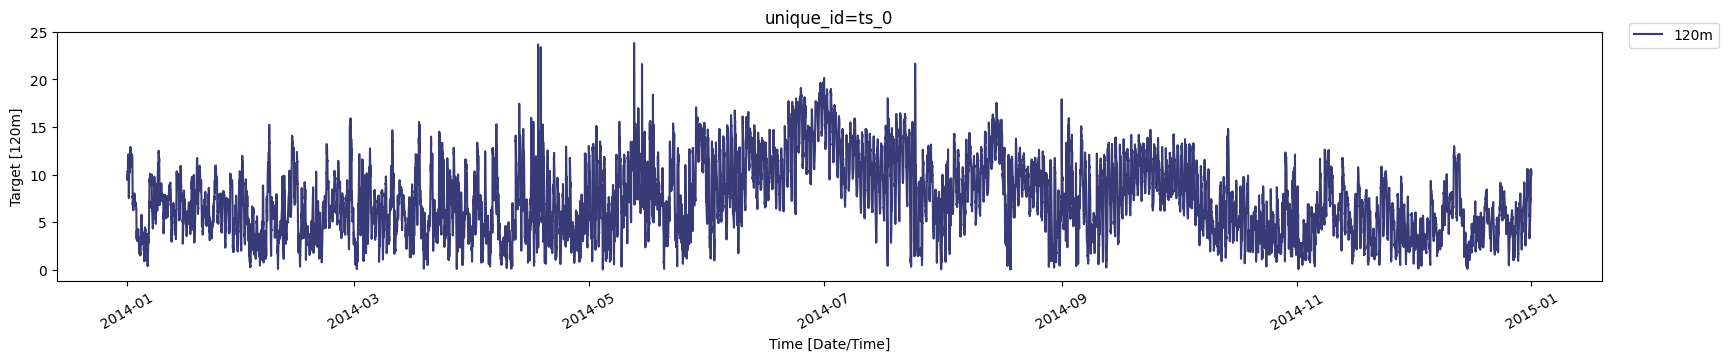

In [ ]:
nixtla_client.plot(df, time_col='Date/Time', target_col='120m')


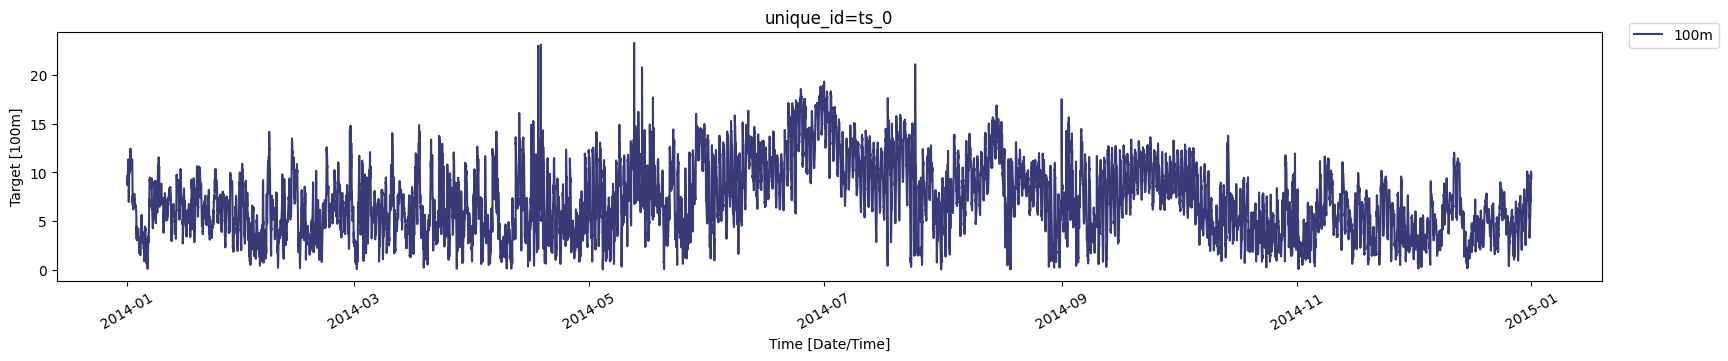

In [ ]:
nixtla_client.plot(df, time_col='Date/Time', target_col='100m')


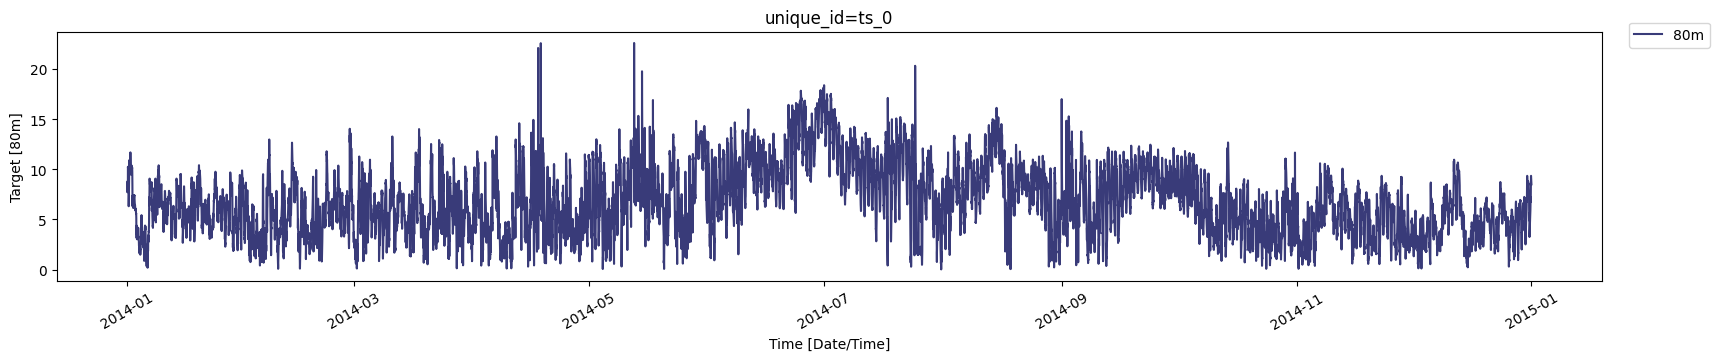

In [ ]:
nixtla_client.plot(df, time_col='Date/Time', target_col='80m')


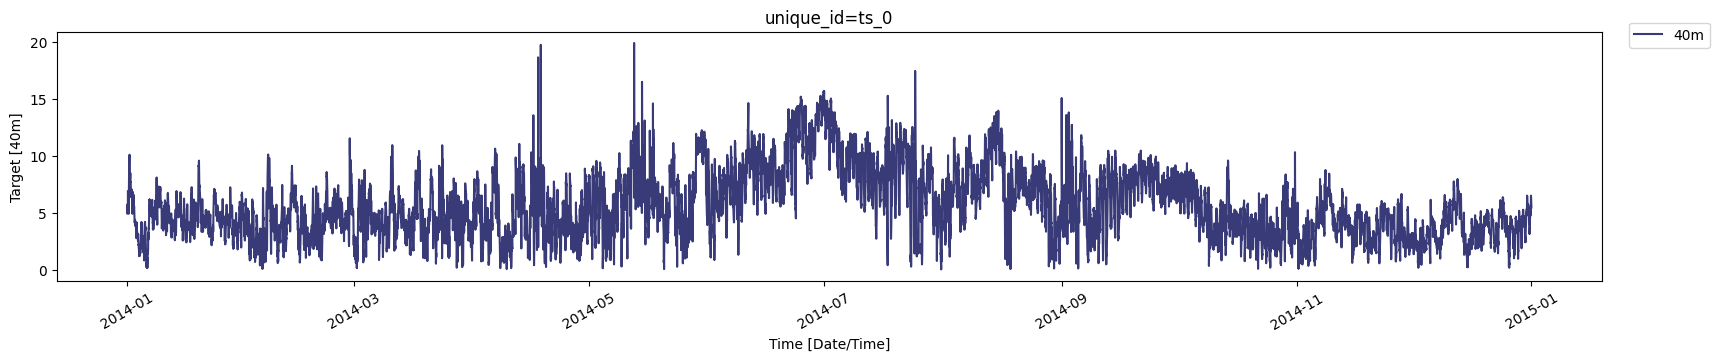

In [ ]:
nixtla_client.plot(df, time_col='Date/Time', target_col='40m')


In [ ]:
df.head(10)

,Date/Time,100m,120m,40m,80m
0,2014-01-01 00:00:00,9.31,9.90,5.38,8.44
1,2014-01-01 00:15:00,9.31,9.90,5.36,8.41
2,2014-01-01 00:30:00,9.22,9.83,5.27,8.31
3,2014-01-01 00:45:00,8.96,9.62,5.08,8.02
4,2014-01-01 01:00:00,8.79,9.48,4.96,7.85
5,2014-01-01 01:15:00,8.69,9.43,4.91,7.72
6,2014-01-01 01:30:00,8.75,9.52,4.94,7.78
7,2014-01-01 01:45:00,8.99,9.74,5.06,8.03
8,2014-01-01 02:00:00,9.28,9.98,5.24,8.34
9,2014-01-01 02:15:00,9.49,10.13,5.45,8.61


In [ ]:
dti = pd.date_range("2014-01-01", periods=3, freq="15min")
dti

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00'],
              dtype='datetime64[ns]', freq='15min')

In [ ]:
data = df

In [ ]:
data.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
data.sort_index(inplace=True)

# Split the data into training (80%) and testing (20%)
split_index = int(len(data) * 0.95)
train_data = data[:split_index]
test_data = data[split_index:]

In [ ]:
train_data

,100m,120m,40m,80m
Date/Time,,,,
2014-01-01 00:00:00,9.31,9.90,5.38,8.44
2014-01-01 00:15:00,9.31,9.90,5.36,8.41
2014-01-01 00:30:00,9.22,9.83,5.27,8.31
2014-01-01 00:45:00,8.96,9.62,5.08,8.02
2014-01-01 01:00:00,8.79,9.48,4.96,7.85
...,...,...,...,...
2014-12-13 16:45:00,6.64,6.79,5.39,6.47
2014-12-13 17:00:00,6.58,6.73,5.18,6.38
2014-12-13 17:15:00,6.66,6.74,5.16,6.54


In [ ]:
fcst_df = nixtla_client.forecast(
    df=train_data.reset_index(),  # Reset the index to make 'Date/Time' a column again,
    h=len(test_data),
    level=[95],
    finetune_steps=10,
    finetune_loss='mae',
    model='timegpt-1-long-horizon',
    time_col='Date/Time',
    target_col='120m'
)

/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:382: UserWarning: `df` contains the following exogenous features: ['100m', '40m', '80m'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


In [ ]:
fcst_df.head()

,Date/Time,TimeGPT,TimeGPT-hi-95,TimeGPT-lo-95
0,2014-12-13 18:00:00,6.406313,7.127711,5.684915
1,2014-12-13 18:15:00,6.376565,7.476338,5.276792
2,2014-12-13 18:30:00,6.368850,7.956148,4.781551
3,2014-12-13 18:45:00,6.393740,8.347705,4.439775
4,2014-12-13 19:00:00,6.409593,8.752446,4.066739


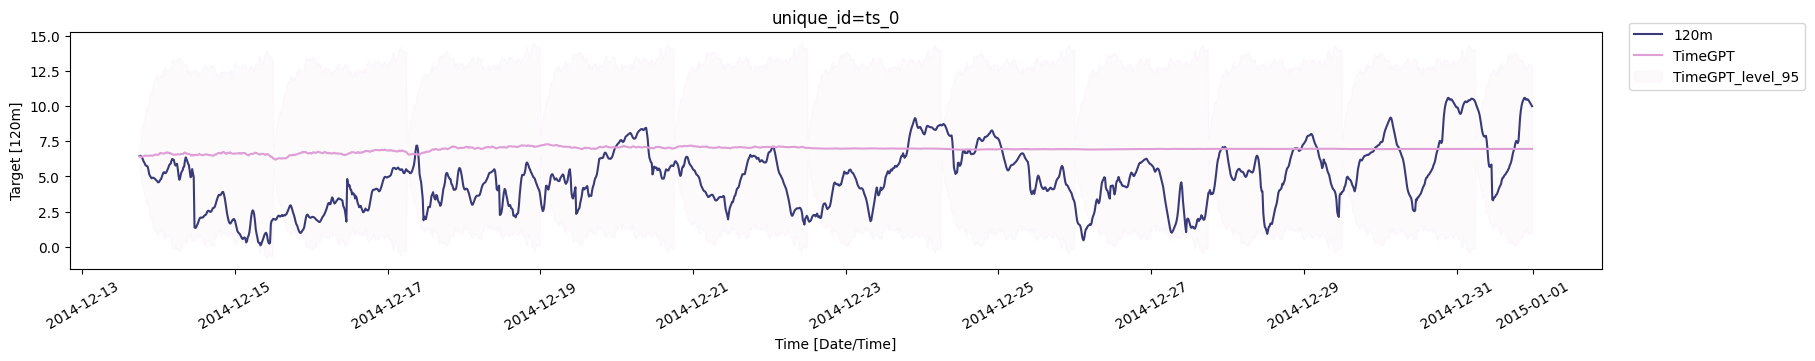

In [ ]:
nixtla_client.plot(test_data.reset_index(), fcst_df, models=['TimeGPT'], level=[95], time_col='Date/Time', target_col='120m')

,100m,120m,40m,80m
Date/Time,,,,


In [6]:
df1 = pd.read_csv('/content/Jaisalmer.csv')
df1.head()

,Date/Time,100m,120m,40m,80m
0,2014-01-01 00:00:00,9.31,9.90,5.38,8.44
1,2014-01-01 00:15:00,9.31,9.90,5.36,8.41
2,2014-01-01 00:30:00,9.22,9.83,5.27,8.31
3,2014-01-01 00:45:00,8.96,9.62,5.08,8.02
4,2014-01-01 01:00:00,8.79,9.48,4.96,7.85


In [7]:
df1.head(1)

,Date/Time,100m,120m,40m,80m
0,2014-01-01 00:00:00,9.31,9.9,5.38,8.44


In [8]:
df1.head(-1)

,Date/Time,100m,120m,40m,80m
0,2014-01-01 00:00:00,9.31,9.90,5.38,8.44
1,2014-01-01 00:15:00,9.31,9.90,5.36,8.41
2,2014-01-01 00:30:00,9.22,9.83,5.27,8.31
3,2014-01-01 00:45:00,8.96,9.62,5.08,8.02
4,2014-01-01 01:00:00,8.79,9.48,4.96,7.85
...,...,...,...,...,...
35034,2014-12-31 22:30:00,9.80,10.45,6.02,8.94
35035,2014-12-31 22:45:00,9.73,10.37,5.89,8.85
35036,2014-12-31 23:00:00,9.65,10.27,5.77,8.78
35037,2014-12-31 23:15:00,9.55,10.16,5.63,8.67


In [9]:
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

# Set the 'Date/Time' column as the index
df1.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
df1.sort_index(inplace=True)

# Resample the data to one-day intervals by taking the mean
df1 = df1.resample('H').mean()

<ipython-input-9-03367d1038ab>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1 = df1.resample('H').mean()


In [10]:
df1.head(10)

,100m,120m,40m,80m
Date/Time,,,,
2014-01-01 00:00:00,9.2000,9.8125,5.2725,8.2950
2014-01-01 01:00:00,8.8050,9.5425,4.9675,7.8450
2014-01-01 02:00:00,9.5200,10.1700,5.5200,8.6325
2014-01-01 03:00:00,9.5675,10.3200,5.5775,8.5975
2014-01-01 04:00:00,9.6375,10.4500,5.3550,8.5300
2014-01-01 05:00:00,11.2225,11.9425,6.7800,10.1925
2014-01-01 06:00:00,11.2400,12.0575,6.5450,10.0950
2014-01-01 07:00:00,11.3025,12.0900,6.5450,10.1450
2014-01-01 08:00:00,10.8800,11.7750,5.8950,9.5675


In [11]:
df1 = df1.reset_index()

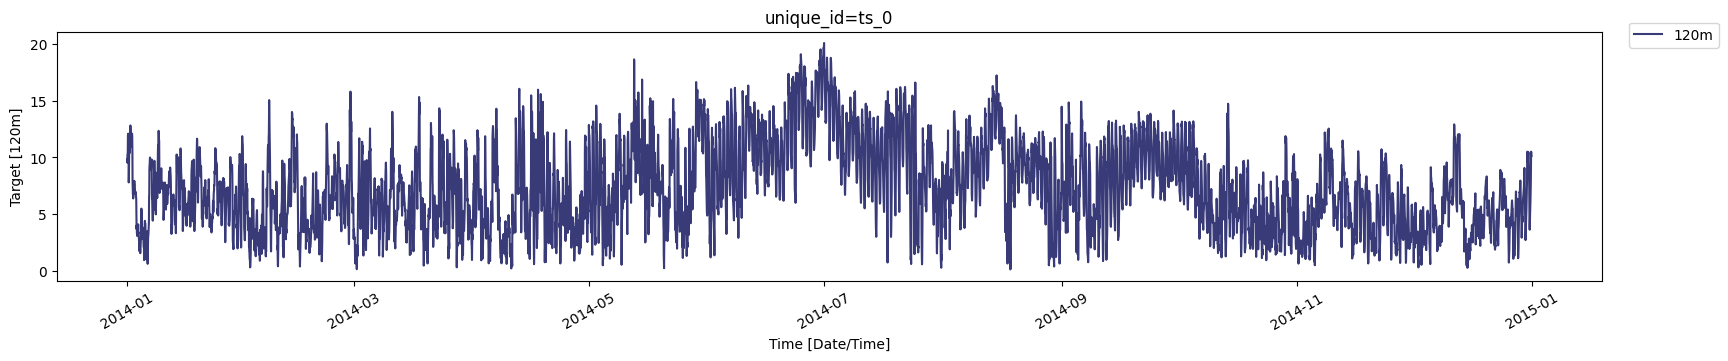

In [12]:
nixtla_client.plot(df1, time_col='Date/Time', target_col='120m')


In [13]:
df1.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
df1.sort_index(inplace=True)

# Split the data into training (80%) and testing (20%)
split_index = int(len(df1) * 0.8)
train_data = df1[:split_index]
test_data = df1[split_index:]

In [14]:

train_data

,100m,120m,40m,80m
Date/Time,,,,
2014-01-01 00:00:00,9.2000,9.8125,5.2725,8.2950
2014-01-01 01:00:00,8.8050,9.5425,4.9675,7.8450
2014-01-01 02:00:00,9.5200,10.1700,5.5200,8.6325
2014-01-01 03:00:00,9.5675,10.3200,5.5775,8.5975
2014-01-01 04:00:00,9.6375,10.4500,5.3550,8.5300
...,...,...,...,...
2014-10-19 19:00:00,2.9125,2.8575,2.5900,2.9450
2014-10-19 20:00:00,2.7800,2.7700,2.4100,2.7700
2014-10-19 21:00:00,1.9325,1.9775,1.3900,1.8525


In [15]:
import time
start_time = time.time()

fcst_df = nixtla_client.forecast(
    df=train_data.reset_index(),  # Reset the index to make 'Date/Time' a column again,
    h=len(test_data),
    level=[95],
    finetune_steps=5,
    finetune_loss='rmse',
    finetune_depth=2,
    model='timegpt-1-long-horizon',
    time_col='Date/Time',
    target_col='120m'
)

end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')

/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:383: UserWarning: `df` contains the following exogenous features: ['100m', '40m', '80m'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


Training Time: 3.62 seconds


In [16]:
fcst_df.head(10)

,Date/Time,TimeGPT,TimeGPT-hi-95,TimeGPT-lo-95
0,2014-10-20 00:00:00,3.458919,5.784563,1.133276
1,2014-10-20 01:00:00,4.144510,8.908106,-0.619086
2,2014-10-20 02:00:00,4.753716,9.376708,0.130723
3,2014-10-20 03:00:00,5.280580,9.958232,0.602927
4,2014-10-20 04:00:00,5.719693,9.153182,2.286203
5,2014-10-20 05:00:00,6.113836,9.276446,2.951227
6,2014-10-20 06:00:00,6.279709,9.617432,2.941986
7,2014-10-20 07:00:00,6.081300,10.655005,1.507595
8,2014-10-20 08:00:00,5.351971,10.330718,0.373224
9,2014-10-20 09:00:00,4.407112,8.813051,0.001172


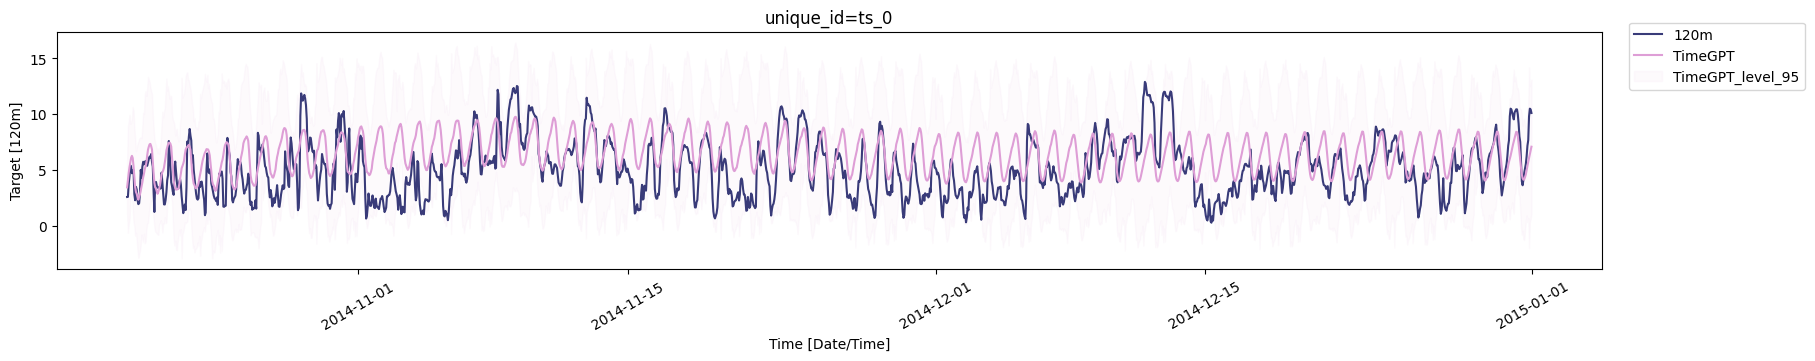

In [17]:
nixtla_client.plot(test_data.reset_index(), fcst_df, models=['TimeGPT'], level=[95], time_col='Date/Time', target_col='120m')

In [18]:
from nixtla import NixtlaClient

from utilsforecast.losses import mse,mae,rmse

In [19]:
test_data = test_data.reset_index()

In [20]:
test_data['unique_id'] = 'a'

In [21]:
test = test_data.copy()

test.loc[:, 'TimeGPT'] = fcst_df['TimeGPT'].values

In [22]:
test

,Date/Time,100m,120m,40m,80m,unique_id,TimeGPT
0,2014-10-20 00:00:00,2.6025,2.5975,2.3300,2.5950,a,3.458919
1,2014-10-20 01:00:00,2.7350,2.6075,2.8750,2.8650,a,4.144510
2,2014-10-20 02:00:00,3.9125,3.7825,3.5225,3.9950,a,4.753716
3,2014-10-20 03:00:00,4.6850,4.4775,4.0375,4.8175,a,5.280580
4,2014-10-20 04:00:00,5.6175,5.4325,4.6400,5.7150,a,5.719693
...,...,...,...,...,...,...,...
1747,2014-12-31 19:00:00,7.4575,7.6800,5.1700,7.1650,a,5.739761
1748,2014-12-31 20:00:00,9.5150,9.8200,6.3100,8.9450,a,6.105239
1749,2014-12-31 21:00:00,10.0125,10.5050,6.3475,9.2600,a,6.425626
1750,2014-12-31 22:00:00,9.8000,10.4350,6.0375,8.9450,a,6.751018


In [23]:
evaluation = rmse(test, models=['TimeGPT'],id_col='unique_id', target_col='120m')

print(evaluation)

  unique_id   TimeGPT
0         a  2.746162


In [24]:
# Add the prediction intervals to the test dataframe
test['TimeGPT-hi-95'] = fcst_df['TimeGPT-hi-95'].values
test['TimeGPT-lo-95'] = fcst_df['TimeGPT-lo-95'].values

# Calculate PICP: Proportion of actual values within the prediction interval
test['Within_Interval'] = (test['120m'] >= test['TimeGPT-lo-95']) & (test['120m'] <= test['TimeGPT-hi-95'])
PICP = test['Within_Interval'].mean()

# Calculate MPIW: Mean width of the prediction intervals
test['Interval_Width'] = test['TimeGPT-hi-95'] - test['TimeGPT-lo-95']
MPIW = test['Interval_Width'].mean()

# Print the results
print(f"PICP: {PICP}")
print(f"MPIW: {MPIW}")


PICP: 0.9417808219178082
MPIW: 10.608041777519464
